In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/diabetes.csv")

print(data.head(10))

print(data.tail())

print(data.shape)

# Missing value detection
print(data.info())

print(data.isna())

print(data.isna().any())

print(data.describe())

# Replacing the 0's with NaN
# records that have 0's in columns Glucose, Blood Pressure, Skin thickness, Insulin, BMI will be replaced with Nan
from numpy import nan
data['Glucose'] = data['Glucose'].replace(0, np.nan)
data['BloodPressure'] = data['BloodPressure'].replace(0, np.nan)
data['SkinThickness'] = data['SkinThickness'].replace(0, np.nan)
data['Insulin'] = data['Insulin'].replace(0, np.nan)
data['BMI'] = data['BMI'].replace(0, np.nan)

# Lets check the above code worked
print(data.head())

print(data.head().isnull())

print(data.isnull().any())

# Count of NaN values in the dataset
print(data.isnull().sum())

print(data.median())

# Filling the NaN data with median
print(data.fillna(data.median(), inplace=True))

# checking if the missing values have been 0
print(data.isnull().sum())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

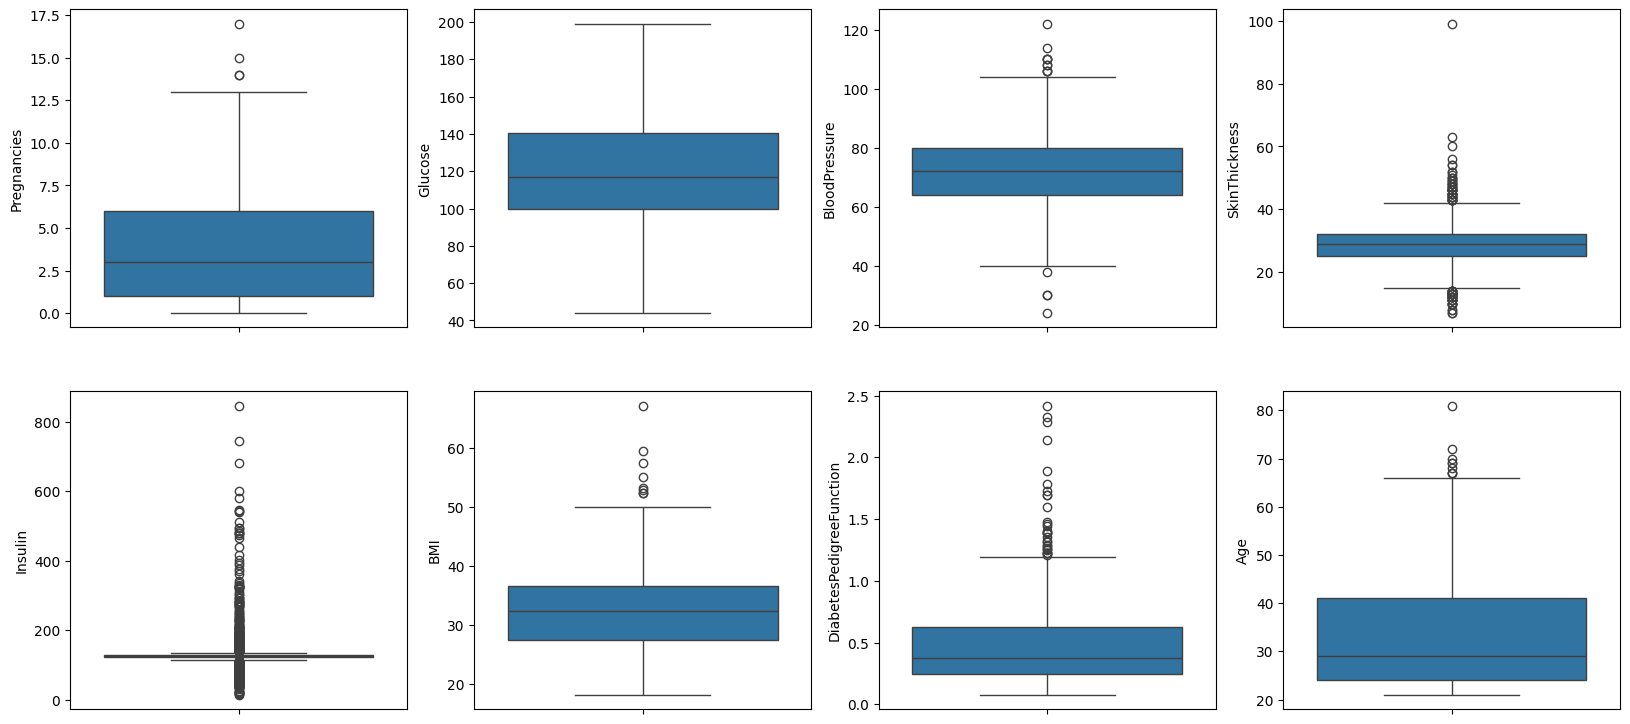

In [15]:

# Outlier detection and treatment using boxplots
plt.figure(figsize=(20,19))
plt.subplot(4,4,1)
sns.boxplot(data['Pregnancies'])
plt.subplot(4,4,2)
sns.boxplot(data['Glucose'])
plt.subplot(4,4,3)
sns.boxplot(data['BloodPressure'])
plt.subplot(4,4,4)
sns.boxplot(data['SkinThickness'])
plt.subplot(4,4,5)
sns.boxplot(data['Insulin'])
plt.subplot(4,4,6)
sns.boxplot(data['BMI'])
plt.subplot(4,4,7)
sns.boxplot(data['DiabetesPedigreeFunction'])
plt.subplot(4,4,8)
sns.boxplot(data['Age'])
plt.show()


In [16]:
data['Pregnancies'] = data['Pregnancies'].clip(lower=data['Pregnancies'].quantile(0.05), upper=data['Pregnancies'].quantile(0.95))
data['BloodPressure'] = data['BloodPressure'].clip(lower=data['BloodPressure'].quantile(0.05), upper=data['BloodPressure'].quantile(0.95))
data['SkinThickness'] = data['SkinThickness'].clip(lower=data['SkinThickness'].quantile(0.05), upper=data['SkinThickness'].quantile(0.95))
data['Insulin'] = data['Insulin'].clip(lower=data['Insulin'].quantile(0.05), upper=data['Insulin'].quantile(0.95))
data['BMI'] = data['BMI'].clip(lower=data['BMI'].quantile(0.05), upper=data['BMI'].quantile(0.95))
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].clip(lower=data['DiabetesPedigreeFunction'].quantile(0.05), upper=data['DiabetesPedigreeFunction'].quantile(0.95))
data['Age'] = data['Age'].clip(lower=data['Age'].quantile(0.05), upper=data['Age'].quantile(0.95))



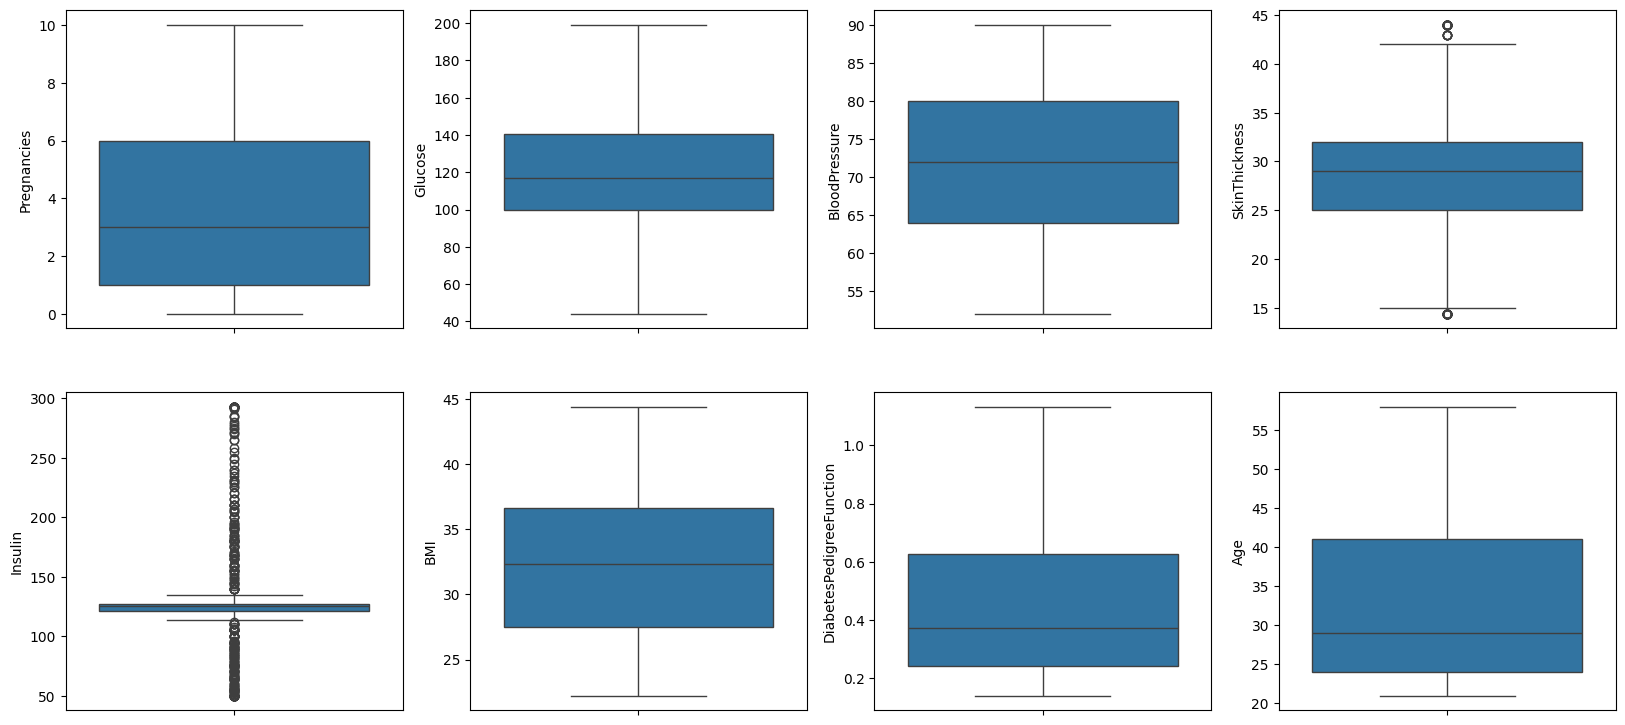

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


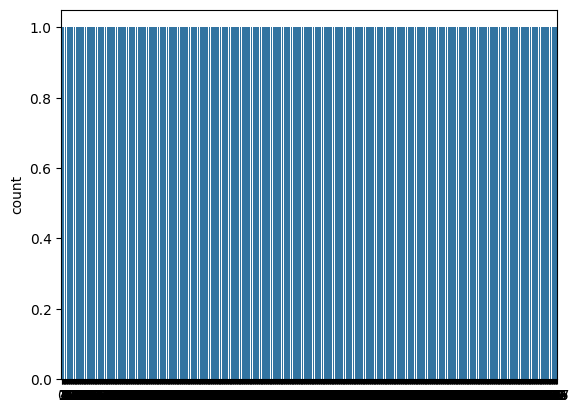

In [17]:
# Lets visualize the Boxplot after imputing outliers
plt.figure(figsize=(20,19))
plt.subplot(4,4,1)
sns.boxplot(data['Pregnancies'])
plt.subplot(4,4,2)
sns.boxplot(data['Glucose'])
plt.subplot(4,4,3)
sns.boxplot(data['BloodPressure'])
plt.subplot(4,4,4)
sns.boxplot(data['SkinThickness'])
plt.subplot(4,4,5)
sns.boxplot(data['Insulin'])
plt.subplot(4,4,6)
sns.boxplot(data['BMI'])
plt.subplot(4,4,7)
sns.boxplot(data['DiabetesPedigreeFunction'])
plt.subplot(4,4,8)
sns.boxplot(data['Age'])
plt.show()
# Lets start by understanding the distribution diabetic vs Non diabetic patients in the data set
sns.countplot(data['Outcome'])

print(data.columns)

In [18]:


from sklearn.model_selection import train_test_split
x = data.drop(['Outcome'], axis=1)
y = data['Outcome']
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)


In [19]:

from sklearn.naive_bayes import GaussianNB
# create a Gaussian Classifier
model = GaussianNB()
model.fit(Xtrain, ytrain)


GaussianNB()

In [20]:

predicted = model.predict(Xtest)
print('Predicted Value:', predicted)


Predicted Value: [1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0
 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [21]:

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy :", metrics.accuracy_score(ytest, predicted))

Accuracy : 0.7792207792207793
